### Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import scipy.stats as stats
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dropout,Dense, Flatten
from keras.utils import to_categorical
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.optimizers import SGD
from tensorflow.keras.layers import LSTM
import warnings
warnings.filterwarnings('ignore')


### Importing Dataset

In [2]:
df1=pd.read_csv('C:/Users/Ojumu PC/Desktop/Dataset/heart_disease_uci.csv',low_memory=False)


In [3]:
df1.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df1.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
df1.shape

(920, 16)

In [7]:
df1.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### Extracting the Important Features

In [8]:
df1 = df1.loc[:,['age','sex','cp','trestbps','chol','thalch','oldpeak','ca','thal','num']]

    

### Assesasing Data Quality

In [9]:
df1['sex'].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

In [10]:
df1['num'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [11]:
#df1['fbs'].value_counts()

### Checking For Duplicate Values

In [12]:
df1.duplicated().sum()

3

In [13]:
df1 = df1[~df1.duplicated()]

In [14]:
df1.duplicated().sum()

0

In [15]:
df1_copy = df1.copy()

In [16]:
df1_copy.head()

,age,sex,cp,trestbps,chol,thalch,oldpeak,ca,thal,num
0,63,Male,typical angina,145.0,233.0,150.0,2.3,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,108.0,1.5,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,129.0,2.6,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,187.0,3.5,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,172.0,1.4,0.0,normal,0


In [17]:
### Aggrating values
def aggregate_values(value):
    if value ==0:
        return "0"
    if value == 1:
        return "1"
    if value == 2:
        return "2"
    if value == 3:
        return "3"
    if value == 4:
        return "4"
    else:
        return "5 and more"
    
### Applying the function


In [18]:
df1['thal'].value_counts()

normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64

In [19]:
# #### data Imputing
# ### Urban_or_rural_area

df1_copy['sex'][df1_copy['sex']=='Male']=1
df1_copy['sex'][df1_copy['sex']=='Female']=2
df1_copy['cp'][df1_copy['cp']=='asymptomatic']=1
df1_copy['cp'][df1_copy['cp']=='non-anginal']=2
df1_copy['cp'][df1_copy['cp']=='atypical angina']=3
df1_copy['cp'][df1_copy['cp']=='typical angina']=4
df1_copy['thal'][df1_copy['thal']=='normal']=1
df1_copy['thal'][df1_copy['thal']=='reversable defect']=2
df1_copy['thal'][df1_copy['thal']=='fixed defect']=3


In [20]:
df1.head()

,age,sex,cp,trestbps,chol,thalch,oldpeak,ca,thal,num
0,63,Male,typical angina,145.0,233.0,150.0,2.3,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,108.0,1.5,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,129.0,2.6,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,187.0,3.5,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,172.0,1.4,0.0,normal,0


###  Data Imputing

In [21]:
def fill_journey(value):
    if value == 0:
        return 'No presence of heart disease.'
    elif value == 1.0:
        return 'Mild or some presence of heart disease'
    elif value == 2.0:
        return 'Moderate presence of heart disease'
    elif value == 3.0:
        return 'Severe presence of heart disease.'
    elif value == 4.0:
        return 'Very severe presence of heart disease'
    elif value == 6.0:
        return 'Not known'
    elif value == 15.0:
        return 'Others'
    else:
        return np.nan

In [22]:
df1_copy['num'].value_counts()

0    410
1    264
2    108
3    107
4     28
Name: num, dtype: int64

In [23]:
lst = [20,30,40,50,60,70]
def speed(value):
    if value in lst:
        return value
    else:
        return np.nan

In [24]:
df1_copy.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'thal', 'num'],
      dtype='object')

In [25]:
df1_copy = df1_copy[['age','sex','cp','chol', 'trestbps','thalch','oldpeak','ca','thal','num']]
df1_copy.dropna(inplace = True)

In [26]:
df1_copy.isnull().sum()

age         0
sex         0
cp          0
chol        0
trestbps    0
thalch      0
oldpeak     0
ca          0
thal        0
num         0
dtype: int64

In [27]:
df1_copy.head()

,age,sex,cp,chol,trestbps,thalch,oldpeak,ca,thal,num
0,63,1,4,233.0,145.0,150.0,2.3,0.0,3,0
1,67,1,1,286.0,160.0,108.0,1.5,3.0,1,2
2,67,1,1,229.0,120.0,129.0,2.6,2.0,2,1
3,37,1,2,250.0,130.0,187.0,3.5,0.0,1,0
4,41,2,3,204.0,130.0,172.0,1.4,0.0,1,0


## Exploratory Data Analysis

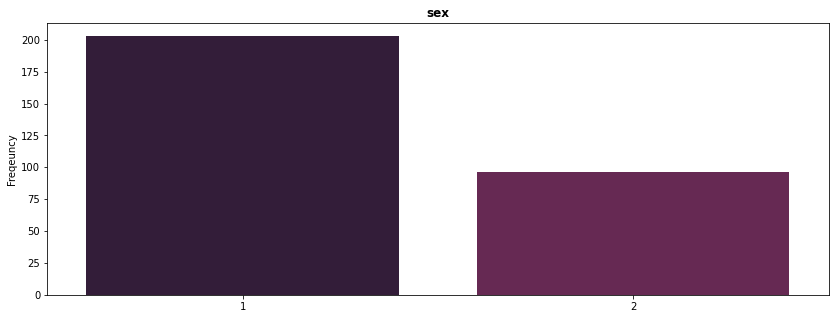

In [28]:
#Barchart of Number of Accidents and Number of Casualties
for column in ["sex"]:
    var_value = df1_copy[column].value_counts()
    
    plt.figure(figsize=(14,5))
    
    plt.grid(False)
    sns.barplot(x=var_value.index, y=var_value, order=var_value.index, 
                palette = sns.color_palette("rocket"))    
    
    plt.title(" ".join(column.split("_")), weight="bold")
    plt.ylabel("Freqeuncy")
    plt.ticklabel_format(style='plain', axis='y')

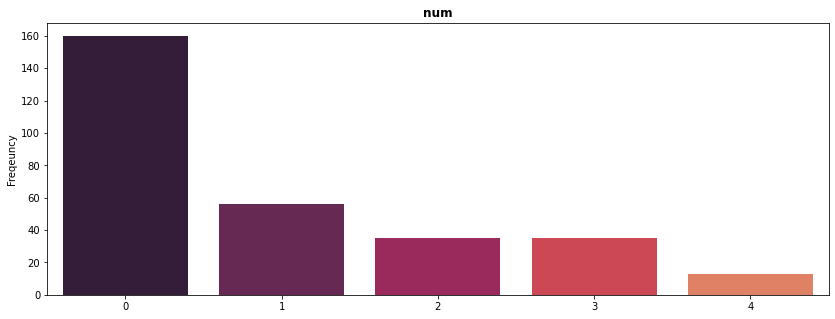

In [29]:
#Barchart of Number of Accidents and Number of Casualties
for column in ["num"]:
    var_value = df1_copy[column].value_counts()
    
    plt.figure(figsize=(14,5))
    
    plt.grid(False)
    sns.barplot(x=var_value.index, y=var_value, order=var_value.index, 
                palette = sns.color_palette("rocket"))    
    
    plt.title(" ".join(column.split("_")), weight="bold")
    plt.ylabel("Freqeuncy")
    plt.ticklabel_format(style='plain', axis='y')

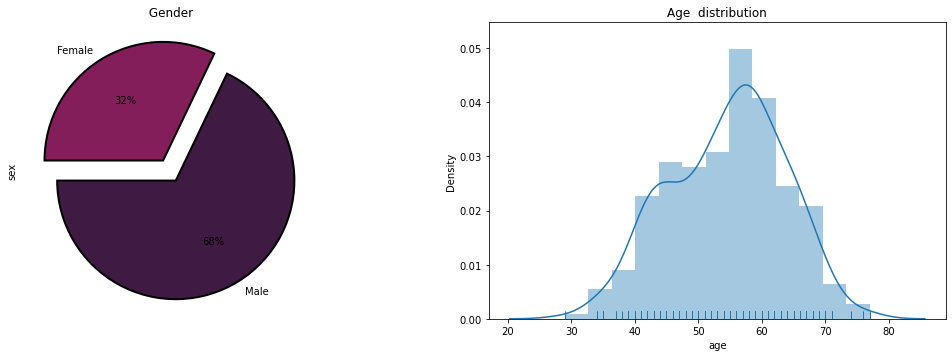

In [30]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df1_copy['sex'].value_counts().plot.pie(autopct = '%1.0f%%', colors = sns.color_palette('rocket',5), startangle = 900, labels =['Male','Female'], wedgeprops = {'linewidth':2, 'edgecolor':'k'}, explode = [.1,.1], shadow = False)
plt.title(' Gender')
plt.subplot(222)
ax = sns.distplot(df1_copy['age'], rug = True)
plt.title('Age  distribution')
plt.show()

### Modeling

In [31]:
df1_copy.columns

Index(['age', 'sex', 'cp', 'chol', 'trestbps', 'thalch', 'oldpeak', 'ca',
       'thal', 'num'],
      dtype='object')

In [32]:
## checking for mising
# count missing data
person_missing_count = df1_copy.isnull().sum().sort_values(ascending=False)
pd.DataFrame({'Percent Missing':person_missing_count/len(df1_copy)})

,Percent Missing
age,0.0
sex,0.0
cp,0.0
chol,0.0
trestbps,0.0
thalch,0.0
oldpeak,0.0
ca,0.0
thal,0.0
num,0.0


In [33]:
df1_copy.isnull().sum()

age         0
sex         0
cp          0
chol        0
trestbps    0
thalch      0
oldpeak     0
ca          0
thal        0
num         0
dtype: int64

In [34]:
df1_copy.head()

,age,sex,cp,chol,trestbps,thalch,oldpeak,ca,thal,num
0,63,1,4,233.0,145.0,150.0,2.3,0.0,3,0
1,67,1,1,286.0,160.0,108.0,1.5,3.0,1,2
2,67,1,1,229.0,120.0,129.0,2.6,2.0,2,1
3,37,1,2,250.0,130.0,187.0,3.5,0.0,1,0
4,41,2,3,204.0,130.0,172.0,1.4,0.0,1,0


### Standardazation

In [35]:
### Extracting and standardizing numerical features
numerical_features = ['age','chol','cp','trestbps','thalch','oldpeak','ca','thal']

In [36]:
scaler = StandardScaler()
df1_copy[numerical_features] = scaler.fit_transform(df1_copy[numerical_features])

In [37]:
df1_copy.head()

,age,sex,cp,chol,trestbps,thalch,oldpeak,ca,thal,num
0,0.940446,1,2.248290,-0.262867,0.749760,0.029124,1.069475,-0.718306,2.445867,0
1,1.384143,1,-0.868737,0.747722,1.596354,-1.790447,0.380309,2.487269,-0.840939,2
2,1.384143,1,-0.868737,-0.339138,-0.661231,-0.880662,1.327912,1.418744,0.802464,1
3,-1.943588,1,0.170272,0.061285,-0.096835,1.632079,2.103224,-0.718306,-0.840939,0
4,-1.499891,2,1.209281,-0.815830,-0.096835,0.982232,0.294163,-0.718306,-0.840939,0


### Spliting the Data

In [38]:
x = df1_copy.drop('num', axis=1)
y = df1_copy['num']

In [39]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       299 non-null    object 
 2   cp        299 non-null    float64
 3   chol      299 non-null    float64
 4   trestbps  299 non-null    float64
 5   thalch    299 non-null    float64
 6   oldpeak   299 non-null    float64
 7   ca        299 non-null    float64
 8   thal      299 non-null    float64
dtypes: float64(8), object(1)
memory usage: 23.4+ KB


### Converting Categorical Data to Integer

In [41]:
x['sex']=x['sex'].astype('int')

In [42]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [43]:
## Using SMOTE for the class imbalance in the target variable distribution using KNN
# RESAMPLED DATA

from imblearn.over_sampling import SMOTE
seed = 101
k = 1 
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = k, random_state = seed)
res_X, res_y = sm.fit_resample(x, y)
X_train,X_test,y_train,y_test = train_test_split(res_X, res_y,test_size=0.3,random_state=0)

### Random Forest

In [44]:
print(y_train.unique())
print(y_test.unique())

[2 4 0 1 3]
[4 0 2 3 1]


In [45]:
df1_copy.head()

,age,sex,cp,chol,trestbps,thalch,oldpeak,ca,thal,num
0,0.940446,1,2.248290,-0.262867,0.749760,0.029124,1.069475,-0.718306,2.445867,0
1,1.384143,1,-0.868737,0.747722,1.596354,-1.790447,0.380309,2.487269,-0.840939,2
2,1.384143,1,-0.868737,-0.339138,-0.661231,-0.880662,1.327912,1.418744,0.802464,1
3,-1.943588,1,0.170272,0.061285,-0.096835,1.632079,2.103224,-0.718306,-0.840939,0
4,-1.499891,2,1.209281,-0.815830,-0.096835,0.982232,0.294163,-0.718306,-0.840939,0


In [46]:
y_train[y_train ==1]= 1
y_train[y_train ==2]= 2
y_train[y_train ==3]= 3
y_train[y_train ==4]= 4
y_train[y_train ==5]= 5

In [47]:
y_test[y_test ==1]= 1
y_test[y_test ==2]= 2
y_test[y_test ==3]= 3
y_test[y_test ==4]= 4
y_test[y_test ==5]= 5

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [49]:
## hyperparameter tunning
n_estimators = [25]
max_depth = [25]
min_samples_leaf = [2]
bootstrap = [True, False]

param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [50]:
###Training the Model
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter=50, cv =2, verbose = 10, random_state=0, n_jobs = 10)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
### Predicting with the trained model
y_pred_rf = rf.predict(X_test)
y_pred_rf = y_pred_rf.astype(int)

In [52]:
y

0      0
1      2
2      1
3      0
4      0
      ..
299    2
300    3
301    1
508    1
748    1
Name: num, Length: 299, dtype: int64

In [53]:
### Classification Report
print('Random Forest Model Classification Report \n -----------------------------')
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy: {:.2f}".format(accuracy))
print(classification_report(y_test, y_pred_rf,
                            target_names=['No','Mild','Moderate', 'Severe', 'Very Severe']))

Random Forest Model Classification Report 
 -----------------------------
Accuracy: 0.49
              precision    recall  f1-score   support

          No       0.75      0.91      0.82        44
        Mild       0.11      0.06      0.07        18
    Moderate       0.24      0.31      0.27        16
      Severe       0.03      0.11      0.05         9
 Very Severe       1.00      0.38      0.55        47

    accuracy                           0.49       134
   macro avg       0.43      0.35      0.35       134
weighted avg       0.64      0.49      0.51       134



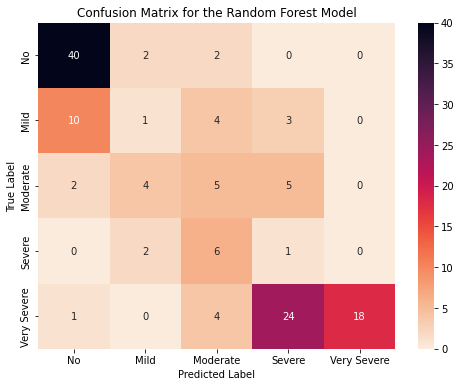

In [54]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, cmap="rocket_r", annot=True, fmt="d", xticklabels=['No','Mild','Moderate', 'Severe', 'Very Severe'],
            yticklabels=['No','Mild','Moderate', 'Severe', 'Very Severe'])
plt.title("Confusion Matrix for the Random Forest Model")
plt.ylabel("True Label")
plt.xlabel("Predicted Label");
#plt.savefig('confusion_matrix.png')

### LightGBM

In [55]:
import lightgbm as lgb

In [56]:
df1_copy.head()

,age,sex,cp,chol,trestbps,thalch,oldpeak,ca,thal,num
0,0.940446,1,2.248290,-0.262867,0.749760,0.029124,1.069475,-0.718306,2.445867,0
1,1.384143,1,-0.868737,0.747722,1.596354,-1.790447,0.380309,2.487269,-0.840939,2
2,1.384143,1,-0.868737,-0.339138,-0.661231,-0.880662,1.327912,1.418744,0.802464,1
3,-1.943588,1,0.170272,0.061285,-0.096835,1.632079,2.103224,-0.718306,-0.840939,0
4,-1.499891,2,1.209281,-0.815830,-0.096835,0.982232,0.294163,-0.718306,-0.840939,0


In [57]:
## Using SMOTE for the class imbalance in the target variable distribution using KNN
# RESAMPLED DATA
from imblearn.over_sampling import SMOTE
seed = 101
k = 1 
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = k, random_state = seed)
res_X, res_y = sm.fit_resample(x, y)
X_train,X_test,y_train,y_test = train_test_split(res_X, res_y,test_size=0.3,random_state=0)

In [58]:
X_train, X_val,y_train, y_val = train_test_split(res_X, res_y,
                                      random_state=0,
                                      test_size=0.30)
# Check the shape of both sets
X_train.shape, X_val.shape

((312, 9), (134, 9))

In [59]:
y_train.unique()

array([2, 4, 0, 1, 3], dtype=int64)

In [60]:
params = {
    'objective': 'multiclass',
    'num_class': 5,
    'metric': 'multi_logloss',
    'verbose': 0
}

#Create a LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

In [61]:
x['sex']

0      1
1      1
2      1
3      1
4      2
      ..
299    1
300    1
301    2
508    1
748    1
Name: sex, Length: 299, dtype: int32

In [62]:
# Training the Model
num_round = 150
evals={}
model = lgb.train(params,
                  train_data,
                  num_round,
                  #early_stopping_rounds=10,
                  valid_sets=[valid_data],
                 callbacks = [lgb.record_evaluation(evals)])

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [63]:
# Getting the model predictions
y_pred = model.predict(X_val,num_iteration=model.best_iteration)
y_pred.shape
y_pred[:5]

array([[7.75140487e-05, 2.52123070e-04, 1.28958674e-05, 4.82704819e-06,
        9.99652640e-01],
       [2.36569864e-06, 1.62992693e-04, 5.23930907e-07, 2.63358904e-06,
        9.99831484e-01],
       [5.86030120e-08, 6.30581935e-05, 2.28809839e-06, 2.73965264e-07,
        9.99934321e-01],
       [9.83015080e-07, 1.50487323e-05, 4.52907210e-08, 8.41664330e-07,
        9.99983081e-01],
       [9.99987146e-01, 1.28236349e-05, 7.03055716e-10, 2.62141085e-08,
        3.23236144e-09]])

In [64]:
# Mapping probabilities to find the class
y_pred = np.argmax(y_pred, axis=1)
y_pred[:10]

array([4, 4, 4, 4, 0, 4, 1, 4, 4, 4], dtype=int64)

In [65]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [66]:
# Get the accuracy score for the prediction values
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6417910447761194


In [67]:
### Classification Report
print('Light XGBoost Model Classification Report \n -----------------------------')
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print(classification_report(y_val, y_pred,
                            target_names=['No','Mild','Modereate', 'Severe', 'Very severe']))

Light XGBoost Model Classification Report 
 -----------------------------
Accuracy: 0.64
              precision    recall  f1-score   support

          No       0.71      0.82      0.76        44
        Mild       0.07      0.06      0.06        18
   Modereate       0.43      0.19      0.26        16
      Severe       0.09      0.11      0.10         9
 Very severe       0.90      0.96      0.93        47

    accuracy                           0.64       134
   macro avg       0.44      0.43      0.42       134
weighted avg       0.61      0.64      0.62       134



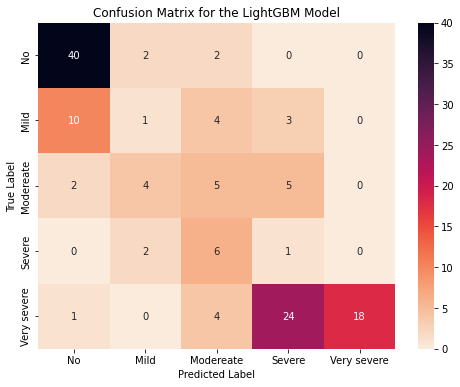

In [68]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, cmap="rocket_r", annot=True, fmt="d", xticklabels=['No','Mild','Modereate', 'Severe', 'Very severe'],
            yticklabels=['No','Mild','Modereate', 'Severe', 'Very severe'])
plt.title("Confusion Matrix for the LightGBM Model")
plt.ylabel("True Label")
plt.xlabel("Predicted Label");
#plt.savefig('confusion_matrix.png')

### LSTM Model

In [ ]:
df1_copy.head()

In [ ]:
x = df1_copy.drop('num', axis=1)
y = df1_copy['num']

In [44]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [45]:
## resetting index
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [46]:
y[y==4].count()

13

In [47]:
label_class1 = np.where(y == 0)[0][:160]
label_class2 = np.where(y == 1)[0][:56]
label_class3 = np.where(y == 2)[0][:35]
label_class4 = np.where(y == 3)[0][:35]
label_class5 = np.where(y == 4)[0][:13]

In [48]:
##Combining the selected samples
selected_labels = np.concatenate([label_class1, label_class2, label_class3, label_class4, label_class5])

In [49]:
# Creating training set
x_data = x.iloc[selected_labels,:]
y_data = y[selected_labels]

In [50]:
y

0      0
1      2
2      1
3      0
4      0
      ..
294    2
295    3
296    1
297    1
298    1
Name: num, Length: 299, dtype: int64

In [51]:
y_data.value_counts()

num
0    160
1     56
2     35
3     35
4     13
Name: count, dtype: int64

In [52]:
print(len(x.iloc[selected_labels,:]))
print(len(y[selected_labels]))

299
299


In [53]:
x

,age,sex,cp,chol,trestbps,thalch,oldpeak,ca,thal
0,0.940446,1,2.248290,-0.262867,0.749760,0.029124,1.069475,-0.718306,2.445867
1,1.384143,1,-0.868737,0.747722,1.596354,-1.790447,0.380309,2.487269,-0.840939
2,1.384143,1,-0.868737,-0.339138,-0.661231,-0.880662,1.327912,1.418744,0.802464
3,-1.943588,1,0.170272,0.061285,-0.096835,1.632079,2.103224,-0.718306,-0.840939
4,-1.499891,2,1.209281,-0.815830,-0.096835,0.982232,0.294163,-0.718306,-0.840939
...,...,...,...,...,...,...,...,...,...
294,1.495068,1,-0.868737,-1.025575,0.693320,-0.360784,2.017078,1.418744,0.802464
295,0.274900,1,-0.868737,-2.207774,-0.096835,-1.487186,0.121872,0.350219,0.802464
296,0.274900,2,1.209281,-0.205664,-0.096835,1.068878,-0.911877,0.350219,-0.840939
297,-0.834344,1,-0.868737,-0.396341,1.031958,-2.223678,0.380309,-0.718306,0.802464


In [54]:
y

0      0
1      2
2      1
3      0
4      0
      ..
294    2
295    3
296    1
297    1
298    1
Name: num, Length: 299, dtype: int64

### Applying SMOTE to Resample the Minority Class and Split into Train/Test

In [55]:
df1_copy.head()

,age,sex,cp,chol,trestbps,thalch,oldpeak,ca,thal,num
0,0.940446,1,2.248290,-0.262867,0.749760,0.029124,1.069475,-0.718306,2.445867,0
1,1.384143,1,-0.868737,0.747722,1.596354,-1.790447,0.380309,2.487269,-0.840939,2
2,1.384143,1,-0.868737,-0.339138,-0.661231,-0.880662,1.327912,1.418744,0.802464,1
3,-1.943588,1,0.170272,0.061285,-0.096835,1.632079,2.103224,-0.718306,-0.840939,0
4,-1.499891,2,1.209281,-0.815830,-0.096835,0.982232,0.294163,-0.718306,-0.840939,0


In [56]:
from imblearn.over_sampling import SMOTE
seed = 101
k = 1 
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = k, random_state = seed)
res_X, res_y = sm.fit_resample(x_data, y_data)
X_train,X_test,y_train,y_test = train_test_split(res_X, res_y,test_size=0.3,random_state=0)


In [57]:
x_train = np.asarray(X_train).astype('float32')
x_test = np.asarray(X_test).astype('float32')

In [58]:
x_train = np.asarray(X_train).astype('float32')
x_test = np.asarray(X_test).astype('float32')

In [59]:
x_train = x_train.reshape(X_train.shape[0],X_train.shape[1],1)
x_test = x_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [60]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [61]:
###Reshaping the input
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [62]:
### encding y label
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train)

In [63]:
y_test = encoder.transform(y_test)

In [64]:
y_test.shape

(134, 5)

In [65]:
n_timesteps, n_features, n_outputs = x_train.shape[1],x_train.shape[2],5

In [66]:
print(n_timesteps)
print(n_features)
print(n_outputs)

9
1
5


In [67]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Add, BatchNormalization
import tensorflow as tf

# Assuming n_timesteps and n_features are defined
n_outputs = 5  # Number of output classes

# Define the input layer
input_layer = Input(shape=(n_timesteps, 1))

# First convolutional block with batch normalization
conv1 = Conv1D(filters=128, kernel_size=2, activation='relu')(input_layer)
# conv1 = BatchNormalization()(conv1)
print('First conv1 layer : ', conv1.shape)

# Second convolutional block with batch normalization
conv2 = Conv1D(filters=64, kernel_size=2, activation='relu')(conv1)
# conv2 = BatchNormalization()(conv2)
print('Second conv2 layer : ', conv2.shape)

pool1 = MaxPooling1D(pool_size=2)(conv2)
print('pool1 : ', pool1.shape)

# First LSTM block
lstm1 = LSTM(32, return_sequences=True)(pool1)
print('First LSTM layer : ', lstm1.shape)

# Second LSTM block with a skip connection
lstm2 = LSTM(32, return_sequences=True)(pool1)  # Skip connection to the first LSTM block
print('Second LSTM layer : ', lstm2.shape)

combined_lstm = Add()([lstm1, lstm2])
combined_lstm = BatchNormalization()(combined_lstm)


# Dense layers
dense1 = Dense(100, activation='relu')(combined_lstm)
flatten1 = Flatten()(dense1)
output_layer = Dense(n_outputs, activation='softmax')(flatten1)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

First conv1 layer :  (None, 8, 128)
Second conv2 layer :  (None, 7, 64)
pool1 :  (None, 3, 64)
First LSTM layer :  (None, 3, 32)
Second LSTM layer :  (None, 3, 32)


In [68]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 1)]       0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 8, 128)       384         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 7, 64)        16448       ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 3, 64)        0           ['conv1d_1[0][0]']               
                                                                                              

In [69]:
## Compiling the model train
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])

In [70]:
np.unique(y_train)

array([0., 1.])

In [71]:
# Define the ModelCheckpoint callback
checkpoint_filepath ='C:\\Users\\Ojumu PC'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',  
    mode='max',  
)

In [72]:
np.unique(y_train)

array([0., 1.])

In [73]:
y_test.shape

(134, 5)

In [74]:
x_test.shape

(134, 9, 1)

In [75]:
# Train your model with the ModelCheckpoint callback
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=100, 
    validation_data=(x_test, y_test),  
    callbacks=[model_checkpoint_callback]  
)

Epoch 1/100
1/3 [=========>....................] - ETA: 16s - loss: 1.8489 - accuracy: 0.0625

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


3/3 [==============================] - 46s 19s/step - loss: 1.7467 - accuracy: 0.1346 - val_loss: 1.5994 - val_accuracy: 0.3358
Epoch 2/100
3/3 [==============================] - 0s 65ms/step - loss: 1.4481 - accuracy: 0.4103 - val_loss: 1.5674 - val_accuracy: 0.3358
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 1.2775 - accuracy: 0.5625

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


3/3 [==============================] - 36s 18s/step - loss: 1.2230 - accuracy: 0.6154 - val_loss: 1.5328 - val_accuracy: 0.6567
Epoch 4/100
3/3 [==============================] - 0s 92ms/step - loss: 1.1028 - accuracy: 0.6731 - val_loss: 1.5003 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 54ms/step - loss: 1.0495 - accuracy: 0.6795 - val_loss: 1.4791 - val_accuracy: 0.3955
Epoch 6/100
3/3 [==============================] - 0s 61ms/step - loss: 1.0015 - accuracy: 0.6859 - val_loss: 1.4738 - val_accuracy: 0.4030
Epoch 7/100
3/3 [==============================] - 0s 59ms/step - loss: 0.9403 - accuracy: 0.6891 - val_loss: 1.4785 - val_accuracy: 0.4104
Epoch 8/100
3/3 [==============================] - 0s 60ms/step - loss: 0.8876 - accuracy: 0.6955 - val_loss: 1.4827 - val_accuracy: 0.4104
Epoch 9/100
3/3 [==============================] - 0s 59ms/step - loss: 0.8487 - accuracy: 0.7179 - val_loss: 1.4776 - val_accuracy: 0.4328
Epoch 10/100
3/3 [==============

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


3/3 [==============================] - 35s 17s/step - loss: 0.2727 - accuracy: 0.9167 - val_loss: 1.2246 - val_accuracy: 0.6642
Epoch 57/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2277 - accuracy: 0.9375

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


3/3 [==============================] - 35s 18s/step - loss: 0.2669 - accuracy: 0.9135 - val_loss: 1.1846 - val_accuracy: 0.6791
Epoch 58/100
3/3 [==============================] - 0s 57ms/step - loss: 0.2636 - accuracy: 0.9295 - val_loss: 1.2087 - val_accuracy: 0.6045
Epoch 59/100
3/3 [==============================] - 0s 53ms/step - loss: 0.2596 - accuracy: 0.9423 - val_loss: 1.2180 - val_accuracy: 0.5821
Epoch 60/100
3/3 [==============================] - 0s 54ms/step - loss: 0.2496 - accuracy: 0.9135 - val_loss: 1.1961 - val_accuracy: 0.6493
Epoch 61/100
3/3 [==============================] - 0s 53ms/step - loss: 0.2489 - accuracy: 0.9071 - val_loss: 1.1752 - val_accuracy: 0.6791
Epoch 62/100
3/3 [==============================] - 0s 54ms/step - loss: 0.2434 - accuracy: 0.9327 - val_loss: 1.2097 - val_accuracy: 0.5821
Epoch 63/100
3/3 [==============================] - 0s 53ms/step - loss: 0.2507 - accuracy: 0.9263 - val_loss: 1.1915 - val_accuracy: 0.6045
Epoch 64/100
3/3 [========

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


3/3 [==============================] - 35s 17s/step - loss: 0.2298 - accuracy: 0.9231 - val_loss: 1.1145 - val_accuracy: 0.7015
Epoch 66/100
3/3 [==============================] - 0s 57ms/step - loss: 0.2280 - accuracy: 0.9231 - val_loss: 1.1508 - val_accuracy: 0.6716
Epoch 67/100
3/3 [==============================] - 0s 55ms/step - loss: 0.2324 - accuracy: 0.9359 - val_loss: 1.1779 - val_accuracy: 0.6045
Epoch 68/100
1/3 [=========>....................] - ETA: 0s - loss: 0.1737 - accuracy: 0.9688

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


3/3 [==============================] - 35s 17s/step - loss: 0.2166 - accuracy: 0.9551 - val_loss: 1.0980 - val_accuracy: 0.7090
Epoch 69/100
3/3 [==============================] - 0s 58ms/step - loss: 0.2181 - accuracy: 0.9391 - val_loss: 1.1345 - val_accuracy: 0.6269
Epoch 70/100
3/3 [==============================] - 0s 55ms/step - loss: 0.2010 - accuracy: 0.9519 - val_loss: 1.1023 - val_accuracy: 0.7015
Epoch 71/100
3/3 [==============================] - 0s 53ms/step - loss: 0.2052 - accuracy: 0.9519 - val_loss: 1.0792 - val_accuracy: 0.7090
Epoch 72/100
3/3 [==============================] - 0s 53ms/step - loss: 0.1919 - accuracy: 0.9551 - val_loss: 1.1427 - val_accuracy: 0.6343
Epoch 73/100
3/3 [==============================] - 0s 55ms/step - loss: 0.1925 - accuracy: 0.9455 - val_loss: 1.1464 - val_accuracy: 0.6045
Epoch 74/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2134 - accuracy: 0.9297

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


3/3 [==============================] - 35s 18s/step - loss: 0.1859 - accuracy: 0.9487 - val_loss: 1.0031 - val_accuracy: 0.7164
Epoch 75/100
1/3 [=========>....................] - ETA: 0s - loss: 0.2030 - accuracy: 0.9453

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


3/3 [==============================] - 35s 17s/step - loss: 0.2032 - accuracy: 0.9359 - val_loss: 1.0170 - val_accuracy: 0.7239
Epoch 76/100
3/3 [==============================] - 0s 56ms/step - loss: 0.1738 - accuracy: 0.9679 - val_loss: 1.1431 - val_accuracy: 0.6045
Epoch 77/100
3/3 [==============================] - 0s 55ms/step - loss: 0.1802 - accuracy: 0.9551 - val_loss: 1.0951 - val_accuracy: 0.6791
Epoch 78/100
3/3 [==============================] - 0s 54ms/step - loss: 0.1661 - accuracy: 0.9615 - val_loss: 0.9821 - val_accuracy: 0.7090
Epoch 79/100
3/3 [==============================] - 0s 53ms/step - loss: 0.1675 - accuracy: 0.9615 - val_loss: 0.9928 - val_accuracy: 0.7090
Epoch 80/100
3/3 [==============================] - 0s 63ms/step - loss: 0.1598 - accuracy: 0.9615 - val_loss: 1.0518 - val_accuracy: 0.7090
Epoch 81/100
3/3 [==============================] - 0s 55ms/step - loss: 0.1644 - accuracy: 0.9647 - val_loss: 1.0138 - val_accuracy: 0.7090
Epoch 82/100
3/3 [========

INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


INFO:tensorflow:Assets written to: C:\Users\Ojumu PC\assets


3/3 [==============================] - 36s 18s/step - loss: 0.1256 - accuracy: 0.9679 - val_loss: 0.8838 - val_accuracy: 0.7313
Epoch 100/100
3/3 [==============================] - 0s 55ms/step - loss: 0.1217 - accuracy: 0.9808 - val_loss: 0.9402 - val_accuracy: 0.7164


In [76]:
np.unique(y_train)

array([0., 1.])

In [77]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 7ms/step - loss: 0.9402 - accuracy: 0.7164


[0.9401970505714417, 0.7164179086685181]

In [78]:
model.evaluate(x_train,y_train)

10/10 [==============================] - 0s 8ms/step - loss: 0.6049 - accuracy: 0.9327


[0.6048668026924133, 0.932692289352417]

In [79]:
### using the model to predict
y_pred_labels = model.predict(x_test)
lstm_y_pred  = np.argmax(y_pred_labels,axis=1)

5/5 [==============================] - 2s 6ms/step


In [80]:
y_true = np.argmax(y_test,axis=1)

In [81]:
# calculate the F1-score, precision, and recall
f1score = f1_score(y_true, lstm_y_pred,average='weighted')
precision = precision_score(y_true, lstm_y_pred,average='weighted')
recall = recall_score(y_true, lstm_y_pred,average='weighted')
accuracy = accuracy_score(y_true,lstm_y_pred)

In [82]:
print('F1-score: {:.2f}'.format(f1score))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('Accuracy: {:.2f}'.format(accuracy))

F1-score: 0.65
Precision: 0.63
Recall: 0.72
Accuracy: 0.72


In [83]:
print('LSTM Model Classification Report \n -----------------------------')
accuracy = accuracy_score(y_true,lstm_y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print(classification_report(y_true, lstm_y_pred,
                            target_names=['No','Mild','Moderate', 'Severe', 'Very Severe']))

LSTM Model Classification Report 
 -----------------------------
Accuracy: 0.72
              precision    recall  f1-score   support

          No       0.75      0.94      0.84        52
        Mild       0.08      0.07      0.08        14
    Moderate       0.00      0.00      0.00        12
      Severe       0.50      0.09      0.15        11
 Very Severe       0.85      1.00      0.92        45

    accuracy                           0.72       134
   macro avg       0.44      0.42      0.40       134
weighted avg       0.63      0.72      0.65       134



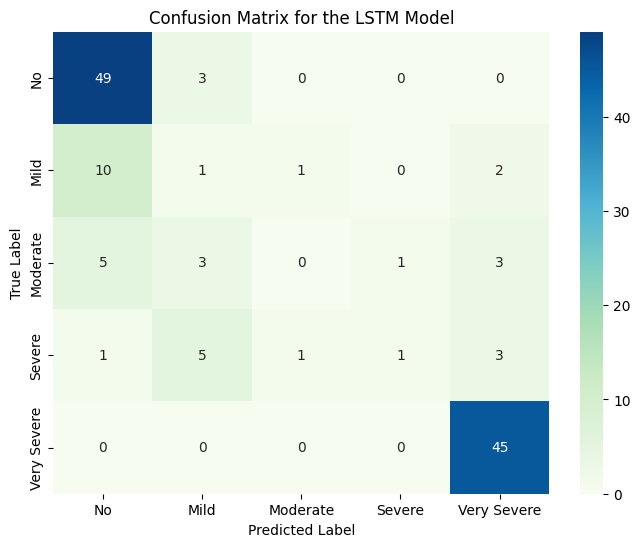

In [86]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_true, lstm_y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, cmap="GnBu", annot=True, fmt="d", xticklabels=['No','Mild','Moderate', 'Severe', 'Very Severe'],
            yticklabels=['No','Mild','Moderate', 'Severe', 'Very Severe'])
plt.title("Confusion Matrix for the LSTM Model")
plt.ylabel("True Label")
plt.xlabel("Predicted Label");
#plt.savefig('confusion_matrix.png')